In [1]:
current_dir = %pwd
image_dir = current_dir + '/../images'

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%pylab inline
%matplotlib inline
#plt.style.use('ggplot')
print plt.style.available
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib
[u'grayscale', u'bmh', u'dark_background', u'ggplot', u'fivethirtyeight']


/home/ruben/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


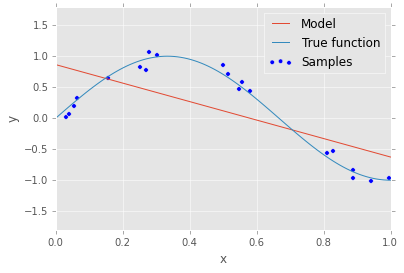

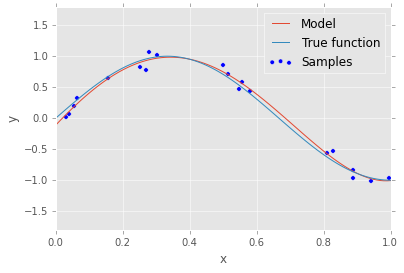

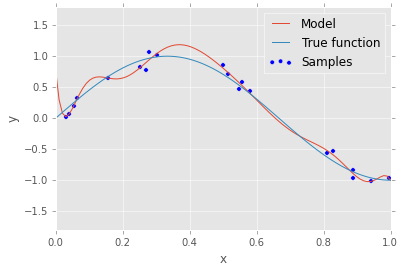

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
n_samples=20
degrees = [1, 4, 11]

true_fun = lambda X: np.sin(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

#plt.figure(figsize=(14, 5))
save_to = ['/underfitting.pdf', '/perfectfitting.pdf', '/overfitting.pdf']
for i in range(len(degrees)):
    fig = plt.figure()
    #ax = plt.subplot(1, len(degrees), i + 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-1.8, 1.8))
    plt.legend(loc="best")
    #plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
    #    degrees[i], -scores.mean(), scores.std()))
    
    plt.savefig(image_dir + save_to[i])

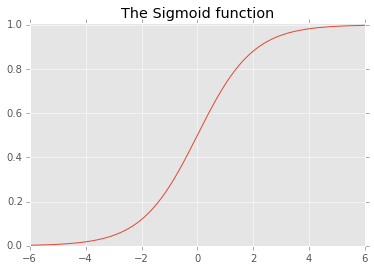

In [4]:
sigmoid = np.vectorize(lambda x: 1 / (1 + np.e ** -x))
x = np.linspace(-5.99, 5.99, 1000)
plt.plot(x, sigmoid(x))
plt.title('The Sigmoid function')
plt.ylim(0, 1.01)
plt.savefig(image_dir + '/sigmoid.pdf')

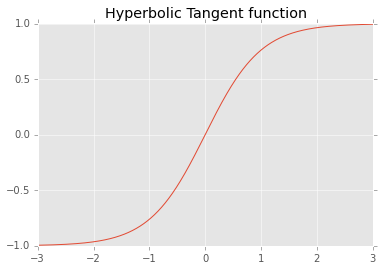

In [82]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, np.tanh(x))
plt.title('Hyperbolic Tangent function')
plt.xlim(-3, 3)
plt.ylim(-1, 1.01)
plt.savefig(image_dir + '/tanh.pdf')

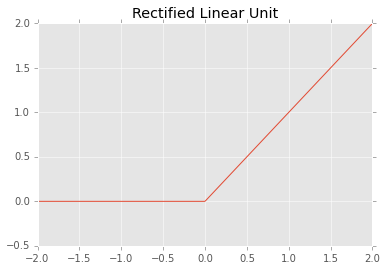

In [94]:
x = np.linspace(-4, 4, 1000)
relu = np.vectorize(lambda x: 0 if x < 0 else x, otypes=[np.float])
plt.plot(x, relu(x))
plt.title('Rectified Linear Unit')
plt.xlim(-2, 2)
plt.ylim(-0.5, 2.01)
plt.savefig(image_dir + '/relu.pdf')

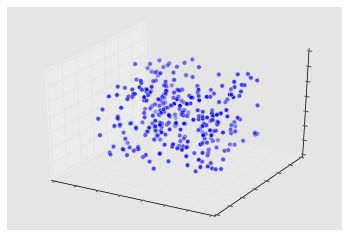

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
xs, ys, zs = np.random.rand(n, 3)*10, np.random.rand(n, 3)*10, np.random.rand(n, 3)*10
ax.scatter(np.random.rand(n, 3), np.random.rand(n, 3), np.random.rand(n, 3))
ax.tick_params(axis='both', which='both', bottom='off',
               labelbottom='off', right='off', left='off', labelleft='off')
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
plt.savefig(image_dir + '/curse_3d.pdf')

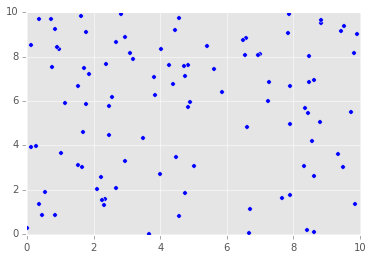

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.random.rand(n)*10, np.random.rand(n)*10)
plt.xlim(-.025, 10.025)
plt.ylim(-.025, 10.025)
ax.tick_params(axis='both', which='both', top='off',
               right='off')

plt.savefig(image_dir + '/curse_2d.pdf')

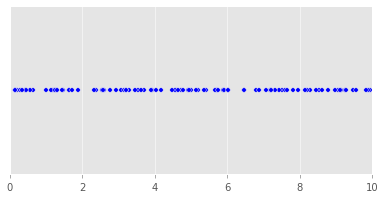

In [78]:
fig = plt.figure(figsize=(6.5,3))
ax = fig.add_subplot(111)
plt.scatter(np.random.rand(n)*10, np.zeros(n))
plt.xlim(0, 10)
plt.ylim(-.5, .5)
ax.tick_params(axis='both', which='both', bottom='on', top='off',
               labelbottom='on', right='off', left='off', labelleft='off')
ax.set_yticks([])
plt.savefig(image_dir + '/curse_1d.pdf')

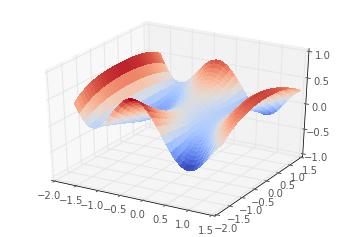

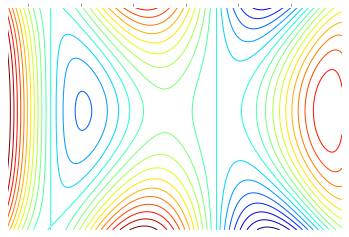

In [109]:
fig = plt.figure()

ax = fig.gca(projection='3d')
X = np.arange(-1.7, 1.5, 0.01)
Y = np.arange(-1.7, 1.5, 0.01)
X, Y = np.meshgrid(X, Y)

Z = np.sin(.5 * X**2 - .25 * Y**2 + 3 * np.ones_like(X)) * np.cos(2 * X + np.ones_like(X))

surf = ax.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.set_axis_bgcolor('white')
#ax.tick_params(axis='both', which='both', bottom='off',
#               labelbottom='off', right='off', left='off', labelleft='off')

plt.savefig(image_dir + '/error_surface.pdf')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X, Y, Z, 20)
ax.set_axis_bgcolor('white')
ax.tick_params(axis='both', which='both', bottom='off',
               labelbottom='off', right='off', left='off', labelleft='off')
ax.set_xticks([])

plt.savefig(image_dir + '/error_contour.pdf')

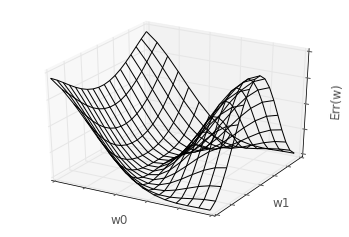

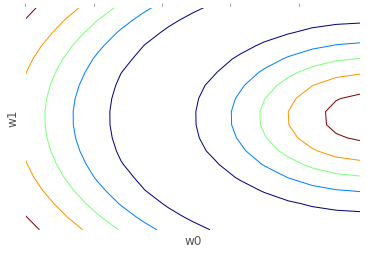

In [71]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 0, 0.35)
Y = np.arange(-3, 3, 0.35)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R)
#surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)
surf = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color='black')
ax.set_zlim(-1.01, 1.01)
ax.set_axis_bgcolor('white')
#ax.set_xlim(-4, 0)
#ax.set_ylim(-4, 0)
ax.set_zlabel('Err(w)')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.tick_params(axis='both', which='both', bottom='off',
               labelbottom='off', right='off', left='off', labelleft='off')

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.savefig(image_dir + '/error_surface2.pdf')

fig = plt.figure()
ax = fig.add_subplot(111)
cs = ax.contour(X, Y, Z, 6)
ax.set_axis_bgcolor('white')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.tick_params(axis='both', which='both', bottom='off',
               labelbottom='off', right='off', left='off', labelleft='off')

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.savefig(image_dir + '/error_contour2.pdf')

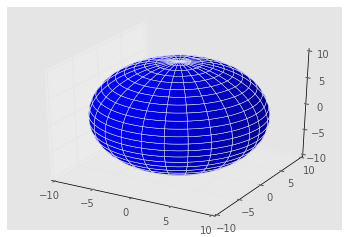

In [107]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 0, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = sin(X) + cos(Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 12)
#ax.set_xlim(-4, 0)
#ax.set_ylim(-4, 0)


#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.savefig(image_dir + '/error_surface3.pdf')

In [97]:
np.ones_like(X)

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])